In [107]:
# Same as before, ensure libraries are installed and imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from tabulate import tabulate 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import joblib



In [108]:
df = pd.read_csv('PRICEDATA.CSV')

In [109]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [110]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", tabulate(missing_values.reset_index(), headers=["Sr_no","Feature", "Missing Values"], tablefmt="pretty"))


Missing Values:
 +-------+--------------------+----------------+
| Sr_no |      Feature       | Missing Values |
+-------+--------------------+----------------+
|   0   |     longitude      |       0        |
|   1   |      latitude      |       0        |
|   2   | housing_median_age |       0        |
|   3   |    total_rooms     |       0        |
|   4   |   total_bedrooms   |      207       |
|   5   |     population     |       0        |
|   6   |     households     |       0        |
|   7   |   median_income    |       0        |
|   8   | median_house_value |       0        |
|   9   |  ocean_proximity   |       0        |
+-------+--------------------+----------------+


In [111]:
# Filling missing values in total_bedrooms with the median
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

# Check for missing values again
median_fill = df.isnull().sum()
# Display feature importance in table format
print("\nmissing values:\n", tabulate(median_fill.reset_index(), headers=["Sr_no","Feature", "Missing Values"], tablefmt="pretty"))



missing values:
 +-------+--------------------+----------------+
| Sr_no |      Feature       | Missing Values |
+-------+--------------------+----------------+
|   0   |     longitude      |       0        |
|   1   |      latitude      |       0        |
|   2   | housing_median_age |       0        |
|   3   |    total_rooms     |       0        |
|   4   |   total_bedrooms   |       0        |
|   5   |     population     |       0        |
|   6   |     households     |       0        |
|   7   |   median_income    |       0        |
|   8   | median_house_value |       0        |
|   9   |  ocean_proximity   |       0        |
+-------+--------------------+----------------+


In [112]:
# Alternatively, filling with the mean
mean_bedrooms = df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(mean_bedrooms, inplace=True)

# Check for missing values again
mean_fill = df.isnull().sum()
print("\nmissing values:\n", tabulate(mean_fill.reset_index(), headers=["Sr_no","Feature", "Missing Values"], tablefmt="pretty"))



missing values:
 +-------+--------------------+----------------+
| Sr_no |      Feature       | Missing Values |
+-------+--------------------+----------------+
|   0   |     longitude      |       0        |
|   1   |      latitude      |       0        |
|   2   | housing_median_age |       0        |
|   3   |    total_rooms     |       0        |
|   4   |   total_bedrooms   |       0        |
|   5   |     population     |       0        |
|   6   |     households     |       0        |
|   7   |   median_income    |       0        |
|   8   | median_house_value |       0        |
|   9   |  ocean_proximity   |       0        |
+-------+--------------------+----------------+


In [113]:
# 3. Generate summary statistics for the dataset
summary_stats = df.describe()
# Display summary statistics in a pretty table format
print("\nSummary Statistics:\n", tabulate(summary_stats.transpose(), headers=["column Names","count","mean","std","min","25%","50%","75%","max"], tablefmt="pretty"))


Summary Statistics:
 +--------------------+---------+---------------------+--------------------+---------+--------------------+--------------------+----------+----------+
|    column Names    |  count  |        mean         |        std         |   min   |        25%         |        50%         |   75%    |   max    |
+--------------------+---------+---------------------+--------------------+---------+--------------------+--------------------+----------+----------+
|     longitude      | 20640.0 | -119.56970445736432 | 2.0035317235025882 | -124.35 |       -121.8       |      -118.49       | -118.01  | -114.31  |
|      latitude      | 20640.0 |  35.63186143410853  | 2.1359523974571153 |  32.54  |       33.93        |       34.26        |  37.71   |  41.95   |
| housing_median_age | 20640.0 | 28.639486434108527  | 12.58555761211165  |   1.0   |        18.0        |        29.0        |   37.0   |   52.0   |
|    total_rooms     | 20640.0 | 2635.7630813953488  | 2181.615251582795  |   

In [114]:
# Ensure you only include numeric columns for correlation
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()


print("\nCorrelation Matrix:\n", tabulate(corr_matrix, headers='keys', tablefmt="pretty"))


Correlation Matrix:
 +--------------------+-----------------------+----------------------+----------------------+----------------------+-----------------------+-----------------------+----------------------+-----------------------+-----------------------+
|                    |       longitude       |       latitude       |  housing_median_age  |     total_rooms      |    total_bedrooms     |      population       |      households      |     median_income     |  median_house_value   |
+--------------------+-----------------------+----------------------+----------------------+----------------------+-----------------------+-----------------------+----------------------+-----------------------+-----------------------+
|     longitude      |          1.0          | -0.9246644339150368  | -0.10819681311244447 | 0.044567977716652225 |  0.0691196977523681   |  0.09977322287464555  | 0.055310092782393315 | -0.015175865414177295 |  -0.0459666151179817  |
|      latitude      |  -0.92466443391

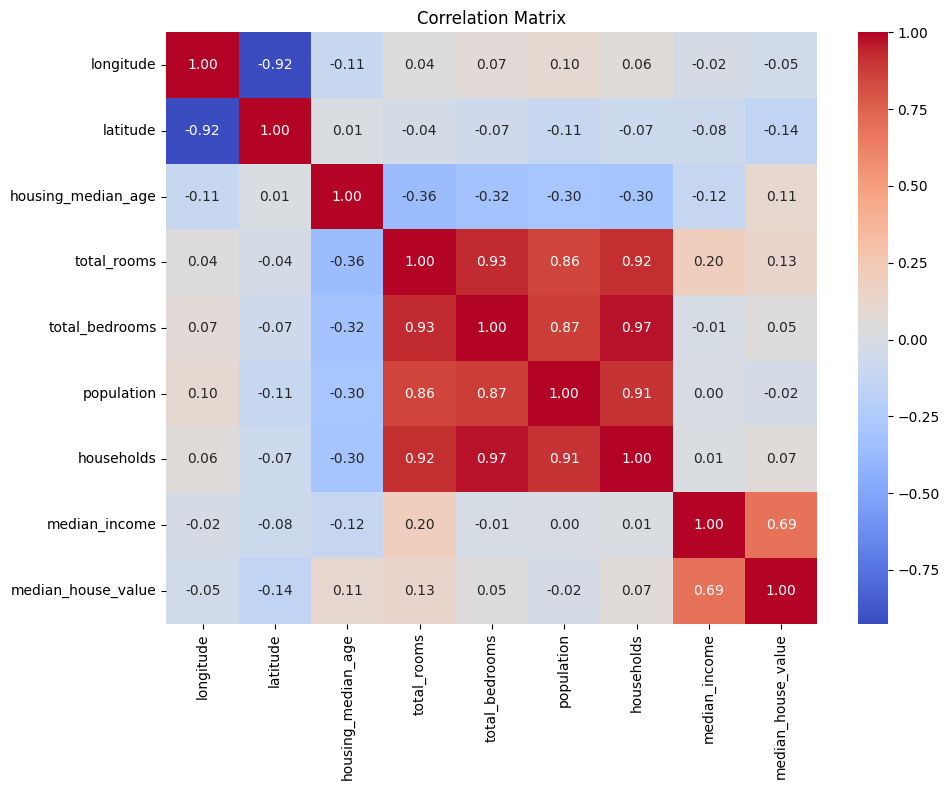

In [115]:

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

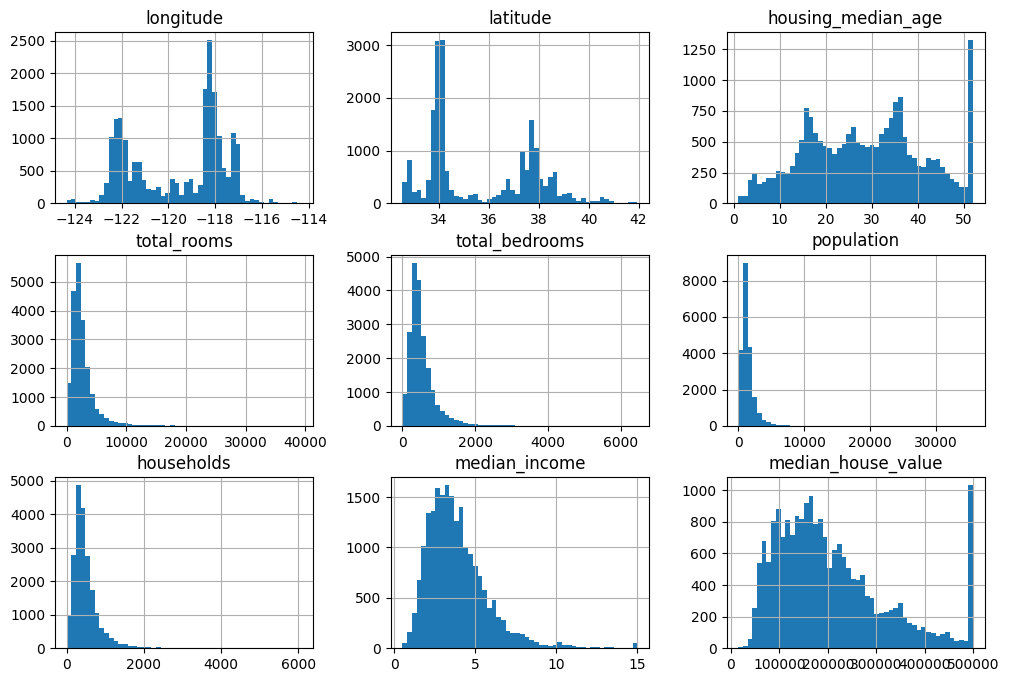

In [116]:
# Histogram for numeric features
df.hist(bins=50, figsize=(12, 8))
plt.show()

In [117]:
# Assuming 'data' is your DataFrame after preprocessing
# Define features (X) and target (y)
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [118]:
# One-Hot Encode the categorical variable 'ocean_proximity'
data_encoded = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y) again after encoding
X = data_encoded.drop("median_house_value", axis=1)
y = data_encoded["median_house_value"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Display feature importance in table format
print("\nFeature Importance:\n", tabulate(feature_importance_df, headers='keys', tablefmt='pretty'))




Feature Importance:
 +----+----------------------------+-----------------------+
|    |          Feature           |      Importance       |
+----+----------------------------+-----------------------+
| 7  |       median_income        |  0.4907168046935401   |
| 8  |   ocean_proximity_INLAND   |  0.14093255406301156  |
| 0  |         longitude          |  0.10609306165933223  |
| 1  |          latitude          |  0.10189653994500376  |
| 2  |     housing_median_age     |  0.05206504236743641  |
| 5  |         population         |  0.03251092583062619  |
| 4  |       total_bedrooms       |  0.02395962471440497  |
| 3  |        total_rooms         |  0.02341227756159323  |
| 6  |         households         | 0.018375944944575326  |
| 11 | ocean_proximity_NEAR OCEAN | 0.008793342893866315  |
| 10 |  ocean_proximity_NEAR BAY  | 0.0008042605208409318 |
| 9  |   ocean_proximity_ISLAND   | 0.0004396208057689412 |
+----+----------------------------+-----------------------+


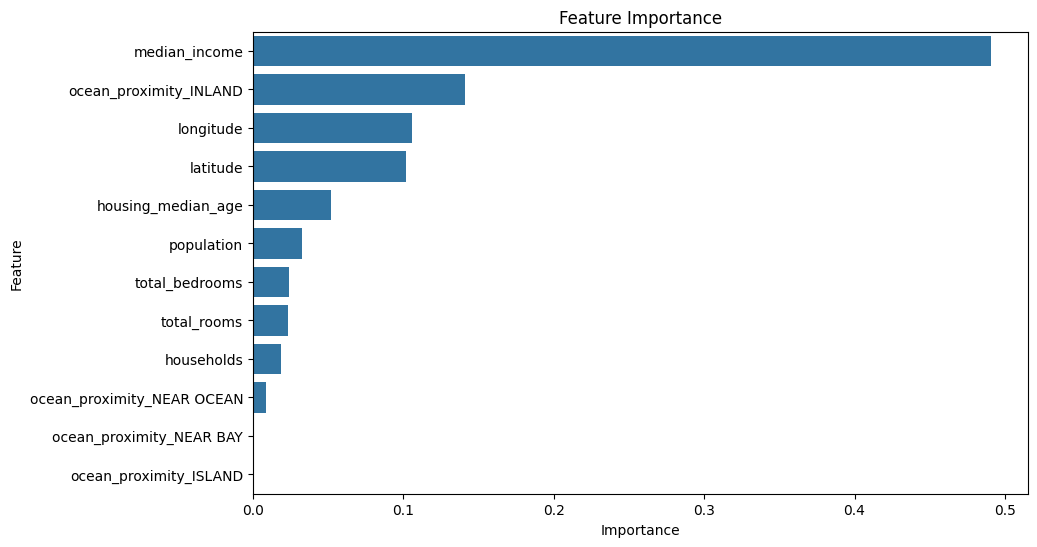

In [119]:

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()




In [129]:
# Get DataFrame info
info = {
    "Index": [],
    "Column": [],
    "Non-Null Count": [],
    "Dtype": []
}

for col in df.columns:
    info["Index"].append(df.columns.get_loc(col))  # Get column index
    info["Column"].append(col)
    info["Non-Null Count"].append(df[col].notnull().sum())
    info["Dtype"].append(df[col].dtype)

# Convert info dictionary to DataFrame
info_df = pd.DataFrame(info)

# Print DataFrame info in a pretty table format
print("\nDataFrame Info:\n", tabulate(info_df, headers='keys', tablefmt="pretty"))


DataFrame Info:
 +----+-------+----------------------------+----------------+---------+
|    | Index |           Column           | Non-Null Count |  Dtype  |
+----+-------+----------------------------+----------------+---------+
| 0  |   0   |         longitude          |     20640      | float64 |
| 1  |   1   |          latitude          |     20640      | float64 |
| 2  |   2   |     housing_median_age     |     20640      |  int64  |
| 3  |   3   |        total_rooms         |     20640      |  int64  |
| 4  |   4   |       total_bedrooms       |     20640      | float64 |
| 5  |   5   |         population         |     20640      |  int64  |
| 6  |   6   |         households         |     20640      |  int64  |
| 7  |   7   |       median_income        |     20640      | float64 |
| 8  |   8   |     median_house_value     |     20640      |  int64  |
| 9  |   9   |   ocean_proximity_INLAND   |     20640      |  bool   |
| 10 |  10   |   ocean_proximity_ISLAND   |     20640      

In [137]:
# One-hot encoding for categorical features
# Ensure that 'ocean_proximity' exists in the DataFrame
if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
else:
    print("'ocean_proximity' column not found!")

# Features and target variable
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "RMSE": rmse,
        "R²": r2
    }

# Display results in a table format
results_df = pd.DataFrame(results).T
print("\nModel Comparison Results:")
# print(results_df)
print("\nDataFrame Info:\n", tabulate(results_df, headers='keys', tablefmt="pretty"))



'ocean_proximity' column not found!

Model Comparison Results:

DataFrame Info:
 +--------------------------+--------------------+-----------------------+
|                          |        RMSE        |          R²           |
+--------------------------+--------------------+-----------------------+
|    Linear Regression     | 70060.52184473521  |  0.6254240620553604   |
|     Ridge Regression     | 70071.66238380093  |  0.6253049276401751   |
|     Lasso Regression     | 70061.93979545915  |  0.6254088998617839   |
|      Random Forest       | 49038.20933848149  |  0.8164888965922015   |
|    Gradient Boosting     | 55884.65900295919  |  0.7616701988665029   |
| Support Vector Regressor | 117228.48149006291 | -0.048719682225777605 |
|         XGBoost          | 47309.12854248549  |  0.8292019367218018   |
+--------------------------+--------------------+-----------------------+


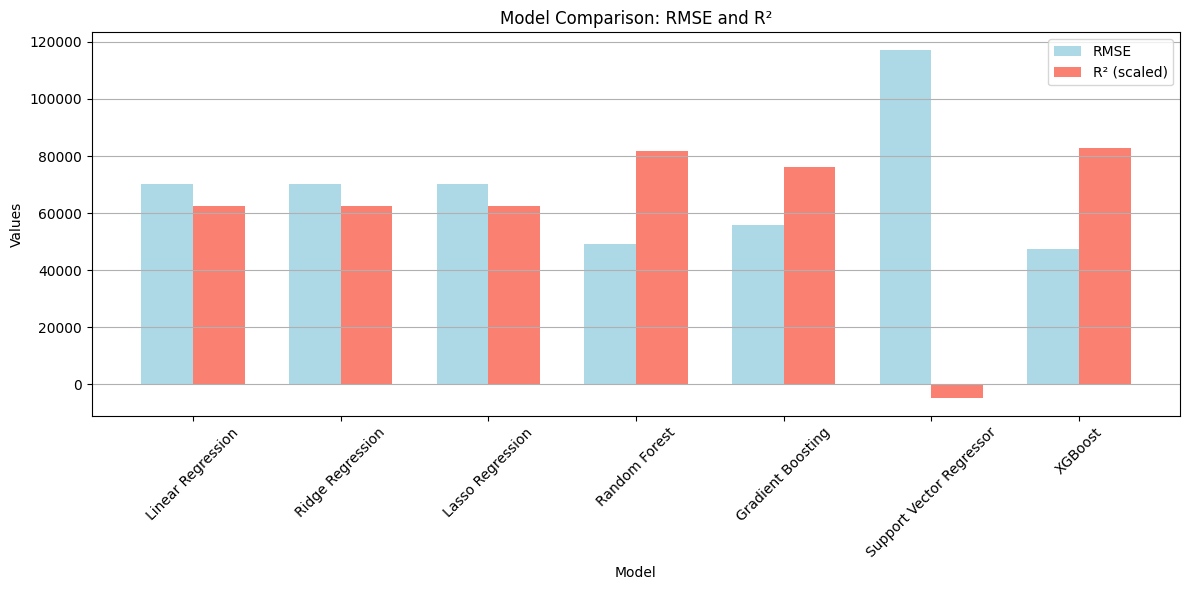

In [130]:
# Plot settings
bar_width = 0.35
index = np.arange(len(results_df))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot RMSE values
ax.bar(index, results_df['RMSE'], bar_width, label='RMSE', color='lightblue')

# Plot R² values
ax.bar(index + bar_width, results_df['R²'] * 100000, bar_width, label='R² (scaled)', color='salmon')  # Scaling R² for better visibility

# Labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Values')
ax.set_title('Model Comparison: RMSE and R²')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(results_df.index, rotation=45)
ax.legend()

# Show grid lines for better readability
ax.yaxis.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [123]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

# Predictions
y_pred = xg_model.predict(X_test)



In [146]:
# Save the model
model_filename = 'xgboost_model.joblib'
joblib.dump(xg_model, model_filename)

print(f"Model saved to {model_filename}")

# Load the model
loaded_model = joblib.load(model_filename)

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_test)



Model saved to xgboost_model.joblib


In [147]:
# Evaluate the loaded model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


# Create a dictionary for metrics
metrics = {'Metric': ['RMSE', 'R²'], 'Value': [rmse, r2]}

# Convert the metrics dictionary to a DataFrame for tabulate
metrics_df = pd.DataFrame(metrics)

# Print the metrics in a tabular format
print("Loaded XGBoost Model Results")
print(tabulate(metrics_df, headers='keys', tablefmt="pretty"))

Loaded XGBoost Model Results
+---+--------+--------------------+
|   | Metric |       Value        |
+---+--------+--------------------+
| 0 |  RMSE  | 47309.12854248549  |
| 1 |   R²   | 0.8292019367218018 |
+---+--------+--------------------+


In [139]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_squared_error, r2_score

# Load the saved model
model_path = 'xgboost_model.joblib'  # Adjust the path as necessary
model = joblib.load(model_path)

# Create a test case DataFrame with all features
test_data = pd.DataFrame({
    'longitude': [-122.23, -122.22, -122.24, -122.25],
    'latitude': [37.88, 37.86, 37.85, 37.85],
    'housing_median_age': [41, 21, 52, 52],
    'total_rooms': [880, 7099, 1467, 1274],
    'total_bedrooms': [129, 1106, 190, 235],
    'population': [322, 2401, 496, 558],
    'households': [126, 1138, 177, 219],
    'median_income': [8.3252, 8.3014, 7.2574, 5.6431],
    'ocean_proximity': ['NEAR BAY', 'NEAR BAY', 'NEAR BAY', 'NEAR BAY']  # Include the ocean proximity for encoding
})

# One-hot encode ocean_proximity as done during training
test_data = pd.get_dummies(test_data, columns=['ocean_proximity'], drop_first=True)

# Load the model's expected feature names
expected_columns = model.get_booster().feature_names

# Reindex test_data to match the expected columns (fills with zeros for any missing columns)
test_data = test_data.reindex(columns=expected_columns, fill_value=0)

# Make predictions
y_pred = model.predict(test_data)

# Create actual values for comparison
y_test_actual = np.array([452600, 358500, 352100, 341300])  # Expected median house values

# Prepare the data for tabulate
results = {
    "Predicted": y_pred,
    "Actual": y_test_actual
}

# Convert to DataFrame for tabulate
results_df = pd.DataFrame(results)

# Display predictions in table format
print("\nPredictions Table:")
print(tabulate(results_df, headers='keys', tablefmt='pretty'))




Predictions Table:
+---+--------------+----------+
|   |  Predicted   |  Actual  |
+---+--------------+----------+
| 0 | 435659.03125 | 452600.0 |
| 1 | 394663.1875  | 358500.0 |
| 2 | 372944.1875  | 352100.0 |
| 3 | 349805.90625 | 341300.0 |
+---+--------------+----------+


In [143]:
# Display performance metrics
print("\nModel Performance Metrics:")

# Create a dictionary for metrics
metrics = {'Metric': ['RMSE', 'R²'], 'Value': [rmse, r2]}

# Convert the metrics dictionary to a DataFrame for tabulate
metrics_df = pd.DataFrame(metrics)

# Print the metrics in a tabular format
print("\nMetrics Table:")
print(tabulate(metrics_df, headers='keys', tablefmt="pretty"))


Model Performance Metrics:

Metrics Table:
+---+--------+--------------------+
|   | Metric |       Value        |
+---+--------+--------------------+
| 0 |  RMSE  | 47309.12854248549  |
| 1 |   R²   | 0.8292019367218018 |
+---+--------+--------------------+


In [4]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load dataset
# data = pd.read_csv(r'C:\Users\MUSTAKIM\Desktop\MODELTEST\DATA\PRICEDATA.CSV')

# # Convert categorical variable 'ocean_proximity' to one-hot encoded variables
# data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# # Calculate correlation matrix
# correlation_matrix = data.corr()

# # Plot the correlation matrix
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
# plt.show()


In [5]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split

# # Prepare the data as before
# X = data.drop(columns=['median_house_value'])
# y = data['median_house_value']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the XGBoost model
# xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
# xg_model.fit(X_train, y_train)

# # Get feature importance
# importance = xg_model.feature_importances_

# # Create a DataFrame for feature importance
# importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Plot feature importance
# plt.figure(figsize=(10, 6))
# sns.barplot(data=importance_df, x='Importance', y='Feature')
# plt.title('Feature Importance from XGBoost')
# plt.show()


In [6]:
# from sklearn.feature_selection import RFE
# from xgboost import XGBRegressor

# # Create the model
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# # Create the RFE model and select the top 5 features
# rfe = RFE(model, n_features_to_select=5)
# fit = rfe.fit(X, y)

# # Summarize selected features
# selected_features = X.columns[fit.support_]
# print("Selected Features: ", selected_features)
